In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Create the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity'], drop_first=True)

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Split the data into features and target variable
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

# Fit the classifier to the data
clf.fit(X, y)

# Make predictions on new data
new_data = pd.DataFrame({
    'Outlook_Sunny': [1],
    'Outlook_Overcast': [0],
    'Outlook_Rain': [0],
    'Temperature_Mild': [1],
    'Temperature_Hot': [0],
    'Temperature_Cool': [0],
    'Humidity_Normal': [1],
    'Humidity_High': [0],
    'Windy': [False]
})

# Ensure the feature names match the ones used during training
new_data = new_data.reindex(columns=X.columns, fill_value=0)

prediction = clf.predict(new_data)
print(f"The prediction is: {prediction[0]}")

The prediction is: Yes


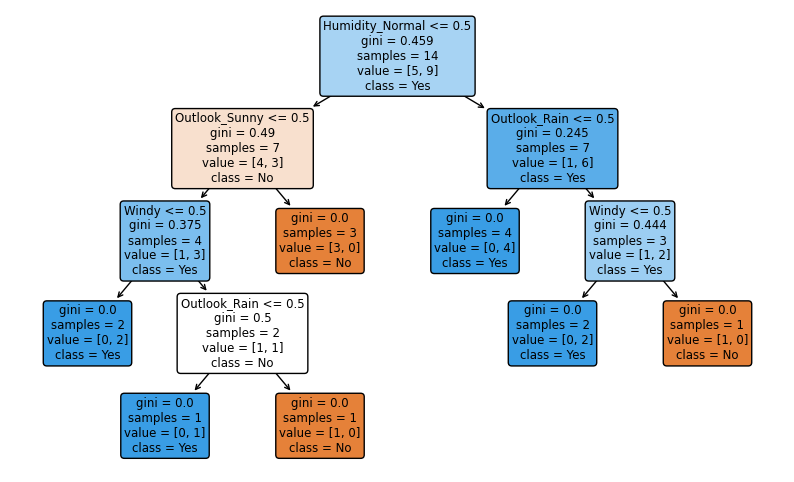

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Create the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Tennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity'], drop_first=True)

# Create decision tree classifier
clf = DecisionTreeClassifier()

# Split the data into features and target variable
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

# Fit the classifier to the data
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()